# Video Game Console Sales


In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")
sns.despine()

Reading in the dataset using pandas. We see that each row entry corresponds to a particular game, the data contains the name of the game, the year it was released as well as a number of categorical traits such as platform, genre and publisher. Finally we see that game (row) entry also includes the cumulative sales achieved, by region by that particular game.

In [2]:
df = pd.read_csv("../dataset/vgsales.csv")
df.head(1)
df.shape

(16598, 11)

Checking the maximum year value we see that it is 2020 which is an impossible release date.

In [3]:
year_data = df['Year']
print("Max Year Value: ", year_data.max())

Max Year Value:  2020.0


Looking at the name of the entry with the erroneous year we can simply search for the game's release date online and replace the current value with the correct release date.

In [4]:
max_entry = year_data.idxmax()
max_entry = df.iloc[max_entry]
pd.DataFrame(max_entry).T

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5957,5959,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.27,0,0,0.02,0.29


In [5]:
df['Year'] = df['Year'].replace(2020.0, 2009.0)
print("Max Year Value: ", year_data.max())

Max Year Value:  2017.0


Below we check the number of games (rows) and the number of unique publishers, platforms and genres to get an idea of how our the games in the dataset are distributed categorically.

In [6]:
print("Number of games: ", len(df))
publishers = df['Publisher'].unique()
print("Number of publishers: ", len(publishers))
platforms = df['Platform'].unique()
print("Number of platforms: ", len(platforms))
genres = df['Genre'].unique()
print("Number of genres: ", len(genres))

Number of games:  16598
Number of publishers:  579
Number of platforms:  31
Number of genres:  12


We do a simple null value check. We could potentially search online for all the missing publication years and publishers but for now we will simply drop the entries for games that do not have all the data.

In [7]:
print(df.isnull().sum())
df = df.dropna()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


Below we create a simple column chart to represent the total 'Global_Sales' of video games per year. We get our data by data our dataframe of all video games sales, grouping it by 'Year' and then calling .sum() to get totals for each year. This creates a dataframe with our years as the index or row names and the entries our total sales for that year.

In the dataset, the index representing years are floating point numbers eg "2006.0" not "2006". We get our x entries by taking these values as integers.

Once data is ready we simply pass our x and y variables to our Seaborn barplot function. We also set our x-label names, the title and we also rotate our xticklabels and change their fontsize.

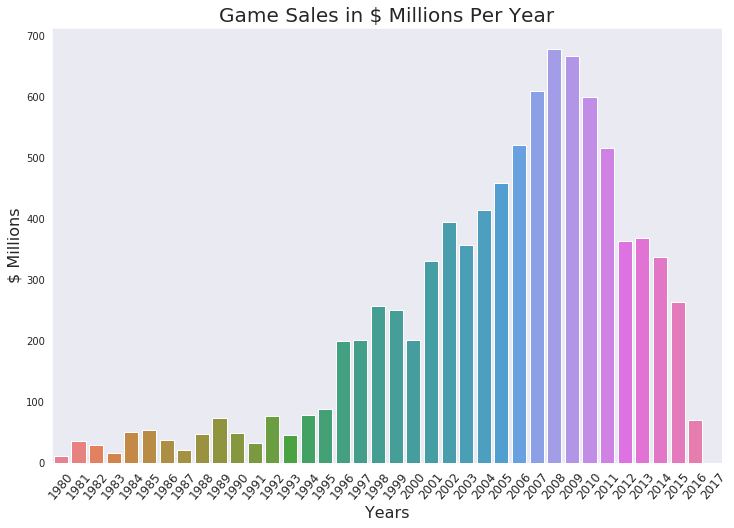

In [8]:
y = df.groupby(['Year']).sum()
y = y['Global_Sales']
x = y.index.astype(int)

plt.figure(figsize=(12,8))
ax = sns.barplot(y = y, x = x,palette="husl")
ax.set_xlabel(xlabel='Years', fontsize=16)
ax.set_xticklabels(labels = x, fontsize=12, rotation=50)
ax.set_ylabel(ylabel='$ Millions', fontsize=16)
ax.set_title(label='Game Sales in $ Millions Per Year', fontsize=20)
plt.show();

Below we create a simple column chart to represent the total total number of releases of video games per year, but with a twist, it is oriented horizontally, which means our Year entries, which usually would be our X-axis, are now on the Y-axis and the count of 'Global_Sales' entries, which would usually be on the Y-axis, are now on the X-axis.

The below chart that represents the number of games released each year is constructed in the same way as the above chart, with the only difference being we count the entries per year instead of summing them.

We use 'palette' parameter of Seaborn's barplot that can be used to personally tune colour schemes but also comes with a large number of preset palettes. here http://seaborn.pydata.org/tutorial/color_palettes.html for a range of choices.

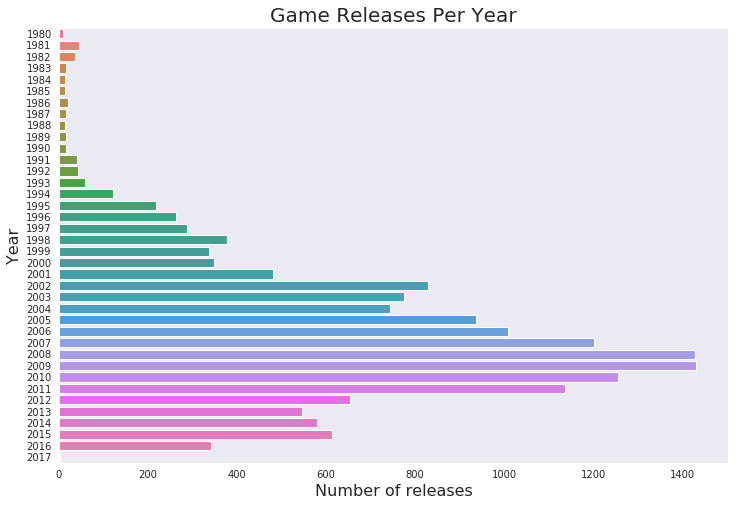

In [9]:
x = df.groupby(['Year']).count()
x = x['Global_Sales']
y = x.index.astype(int)

plt.figure(figsize=(12,8))
colors = sns.color_palette("husl",len(y))
ax = sns.barplot(y = y, x = x, orient='h', palette=colors)
ax.set_xlabel(xlabel='Number of releases', fontsize=16)
ax.set_ylabel(ylabel='Year', fontsize=16)
ax.set_title(label='Game Releases Per Year', fontsize=20)
plt.show();

In [10]:
x

Year
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     349
2001.0     482
2002.0     829
2003.0     775
2004.0     744
2005.0     936
2006.0    1008
2007.0    1201
2008.0    1428
2009.0    1432
2010.0    1257
2011.0    1136
2012.0     655
2013.0     546
2014.0     580
2015.0     614
2016.0     342
2017.0       3
Name: Global_Sales, dtype: int64

Below we create a pointplot with the highest Sales per Publisher each year. Global sales is on the Y-axis, years on the X-axis and we represent the highest Publisher by using the pointplot's parameter "hue". We use a pivot table which makes it easy to calculate "publishers", the names of the highest publisher by sales for each year and "sales", the global sales generated by that publisher for each year. Notice that the pivot table takes a parameter for function to apply which has other options like mean, median and mode.

The pointplot takes a dataframe and then you can easily just add the column names to x and y and hue. We also customize our xticklabels by rotating then and changing their size.

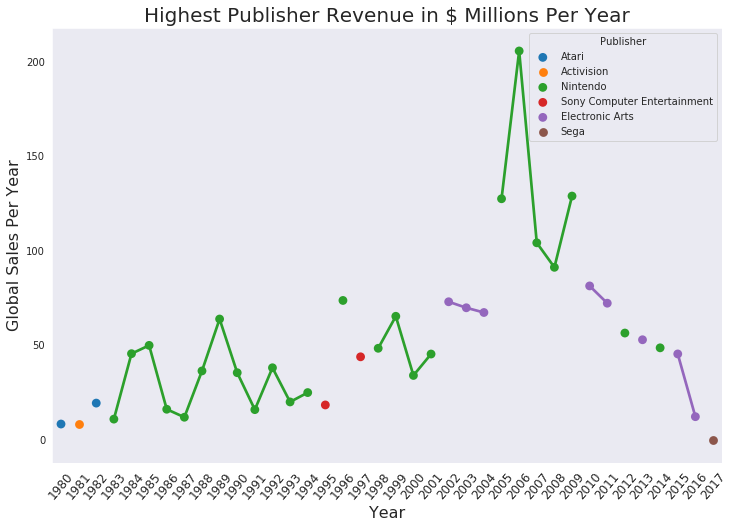

In [11]:
table = df.pivot_table('Global_Sales', index='Publisher', columns='Year', aggfunc='sum')
publishers = table.idxmax()
sales = table.max()
years = table.columns.astype(int)
data = pd.concat([publishers, sales], axis=1)
data.columns = ['Publisher', 'Global Sales']

plt.figure(figsize=(12,8))
ax = sns.pointplot(y = 'Global Sales', x = years, hue='Publisher', data=data, size=15)
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_ylabel(ylabel='Global Sales Per Year', fontsize=16)
ax.set_title(label='Highest Publisher Revenue in $ Millions Per Year', fontsize=20)
ax.set_xticklabels(labels = years, fontsize=12, rotation=50)
plt.show();

Below we plot the highest global sales generated by genre per year in the same way as the above plot. Notice we set the "palette" of our pointplot. There are many types of colour maps that suit both categorical data as well as sequential data at https://matplotlib.org/users/colormaps.html

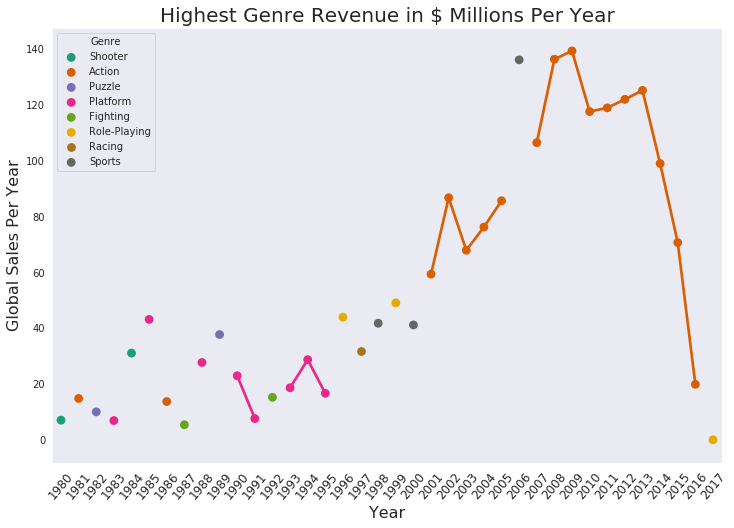

In [12]:
table = df.pivot_table('Global_Sales', index='Genre', columns='Year', aggfunc='sum')
genres = table.idxmax()
sales = table.max()
years = table.columns.astype(int)
data = pd.concat([genres, sales], axis=1)
data.columns = ['Genre', 'Global Sales']

plt.figure(figsize=(12,8))
ax = sns.pointplot(y = 'Global Sales', x = years, hue='Genre', data=data, size=15, palette='Dark2')
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_ylabel(ylabel='Global Sales Per Year', fontsize=16)
ax.set_title(label='Highest Genre Revenue in $ Millions Per Year', fontsize=20)
ax.set_xticklabels(labels = years, fontsize=12, rotation=50)
plt.show();

Below we create a barplot of the Global Sales generated by the game that makes the most money each year. We also return a dataframe below for reference. One could potentially map different colours to each game but adding a legend to a plot with so many entries can make a plot look messy.

The data creation for this plot is similar to that above, excluding the use of hue to represent categories in our data. Instead we use a colour palette, passing it the number of colours in that particular colour palette that we want. 

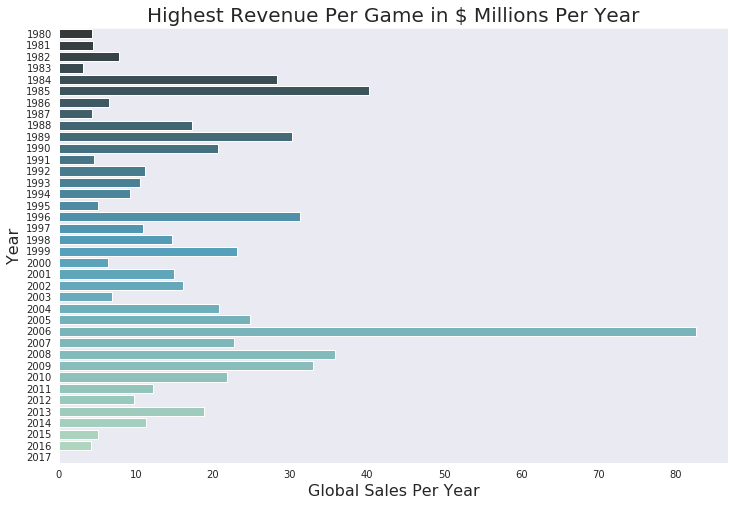

,Game,Global Sales
Year,,
1980,Asteroids,4.310
1981,Pitfall!,4.500
1982,Pac-Man,7.810
1983,Baseball,3.200
1984,Duck Hunt,28.310
1985,Super Mario Bros.,40.240
1986,The Legend of Zelda,6.510
1987,Zelda II: The Adventure of Link,4.380
1988,Super Mario Bros. 3,17.280


In [13]:
table = df.pivot_table('Global_Sales', index='Name', columns='Year')
table.columns = table.columns.astype(int)
games = table.idxmax()
sales = table.max()
years = table.columns
data = pd.concat([games, sales], axis=1)
data.columns = ['Game', 'Global Sales']


colors = sns.color_palette("GnBu_d", len(years))
plt.figure(figsize=(12,8))
ax = sns.barplot(y = years , x = 'Global Sales', data=data, orient='h', palette=colors)
ax.set_xlabel(xlabel='Global Sales Per Year', fontsize=16)
ax.set_ylabel(ylabel='Year', fontsize=16)
ax.set_title(label='Highest Revenue Per Game in $ Millions Per Year', fontsize=20)
plt.show();
data

Below we plot the platform with the highest total platform sales per year very similarly to the other pointplots above.

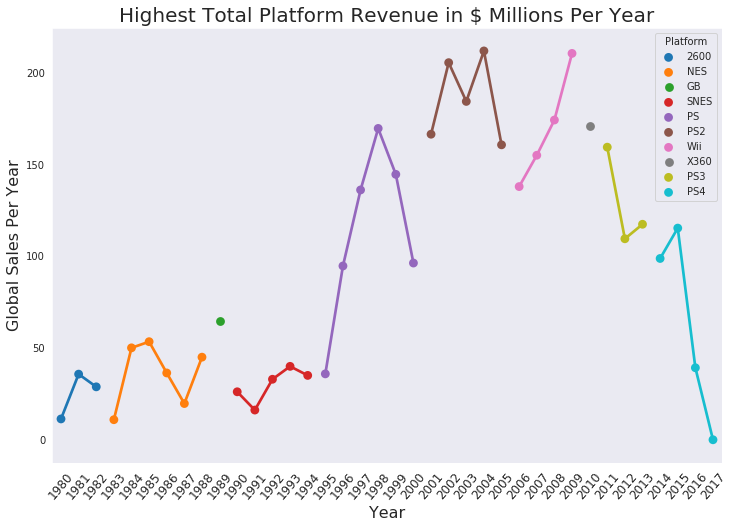

In [14]:
table = df.pivot_table('Global_Sales', index='Platform', columns='Year', aggfunc='sum')
platforms = table.idxmax()
sales = table.max()
years = table.columns.astype(int)
data = pd.concat([platforms, sales], axis=1)
data.columns = ['Platform', 'Global Sales']

plt.figure(figsize=(12,8))
ax = sns.pointplot(y = 'Global Sales', x = years, hue='Platform', data=data, size=15)
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_ylabel(ylabel='Global Sales Per Year', fontsize=16)
ax.set_title(label='Highest Total Platform Revenue in $ Millions Per Year', fontsize=20)
ax.set_xticklabels(labels = years, fontsize=12, rotation=50)
plt.show();

Below we create 2 plots: the top 10 publishers by the number of games they have released and the total sales generated, the only difference being the we apply count() in the first instance and sum() in the second.

We groupby 'Publisher', choose a single column, sort in descending order and then choose the top 10 values. We also apply the sequential colourmaps "spring" and "cool" to our plots.

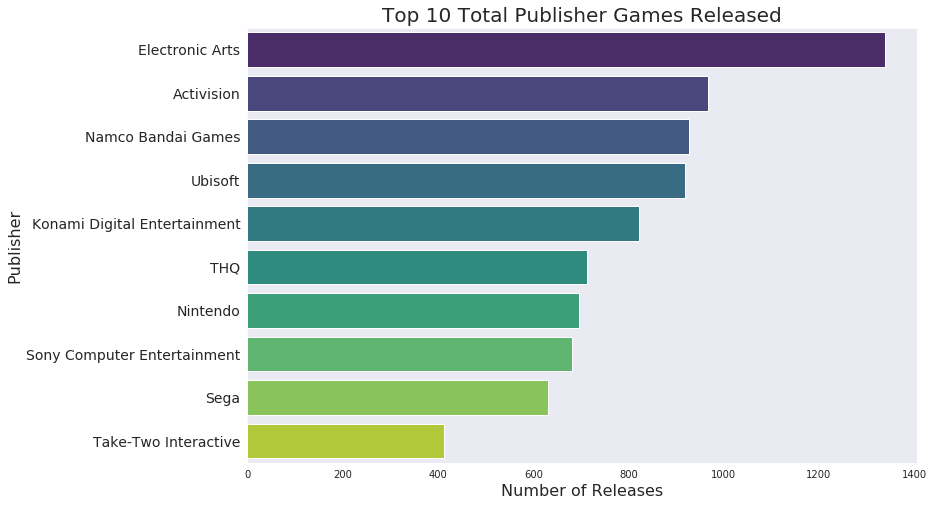

In [15]:
data = df.groupby(['Publisher']).count().iloc[:,0]
data = pd.DataFrame(data.sort_values(ascending=False))[0:10]
publishers = data.index
data.columns = ['Releases']

colors = sns.color_palette("viridis", len(data))
plt.figure(figsize=(12,8))
ax = sns.barplot(y = publishers , x = 'Releases', data=data, orient='h', palette=colors)
ax.set_xlabel(xlabel='Number of Releases', fontsize=16)
ax.set_ylabel(ylabel='Publisher', fontsize=16)
ax.set_title(label='Top 10 Total Publisher Games Released', fontsize=20)
ax.set_yticklabels(labels = publishers, fontsize=14)
plt.show();

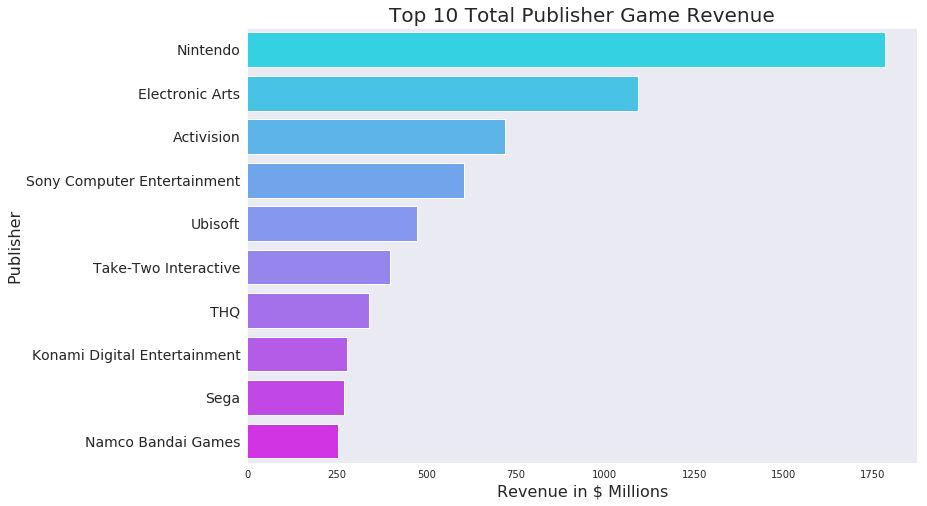

In [16]:
data = df.groupby(['Publisher']).sum()['Global_Sales']
data = pd.DataFrame(data.sort_values(ascending=False))[0:10]
publishers = data.index
data.columns = ['Global Sales']

colors = sns.color_palette("cool", len(data))
plt.figure(figsize=(12,8))
ax = sns.barplot(y = publishers , x = 'Global Sales', data=data, orient='h', palette=colors)
ax.set_xlabel(xlabel='Revenue in $ Millions', fontsize=16)
ax.set_ylabel(ylabel='Publisher', fontsize=16)
ax.set_title(label='Top 10 Total Publisher Game Revenue', fontsize=20)
ax.set_yticklabels(labels = publishers, fontsize=14)
plt.show();

Below we create 3 heatmaps representing data for our top 10 publishers for each year: total revenue generated, the average revenue generated and the number of game releases. The creation of the plots are identical, all that differs is our pivot table "aggfunc". We use "sum" for total revenue, "mean" for average revenue per game and "count" for the number of releases. We create a pivot table and use a list comprehension to select the entries for our top10 publishers.

We reshape the data into 10 rows(10 publishers) and 38 columns(38 years from 1980-2017) for all our publisher heatmaps. Notice our yticklabels are just reversed because of the way our reshape operation rearranged the data. Also note that we can pass a colour map to our heatmap function by using "cmap=...". See https://matplotlib.org/users/colormaps.html for a number of colourmap options.

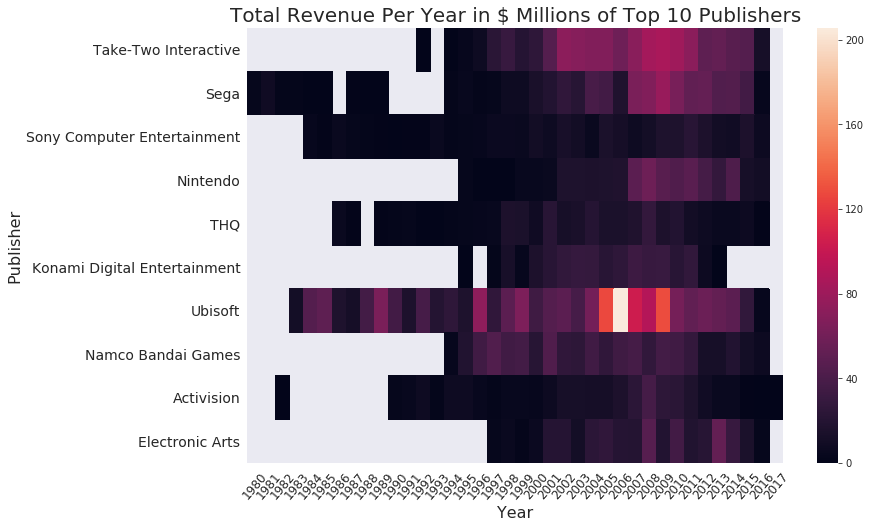

In [17]:
top10 = ['Electronic Arts', 'Activision', 'Namco Bandai Games', 'Ubisoft', 'Konami Digital Entertainment', 'THQ', 'Nintendo', 'Sony Computer Entertainment', 'Sega', 'Take-Two Interactive']
table = df.pivot_table('Global_Sales', columns='Publisher', index='Year', aggfunc='sum')
data = [table[i] for i in top10]
data = np.array(data)
data = pd.DataFrame(np.reshape(data, (10, 38)))
years = table.index.astype(int)

plt.figure(figsize=(12,8))
ax = sns.heatmap(data)
ax.set_xticklabels(labels = years, fontsize=12, rotation=50)
ax.set_yticklabels(labels = top10[::-1], fontsize=14, rotation=0)
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_ylabel(ylabel='Publisher', fontsize=16)
ax.set_title(label='Total Revenue Per Year in $ Millions of Top 10 Publishers', fontsize=20)
plt.show();

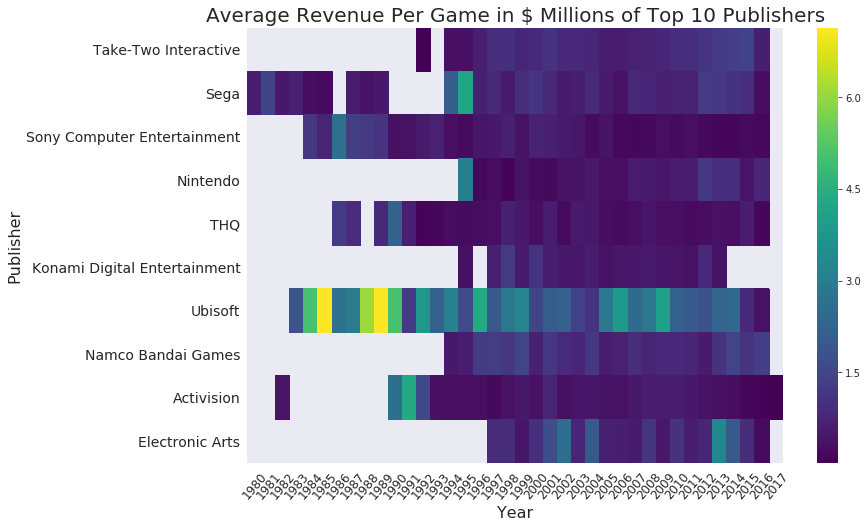

In [18]:
top10 = ['Electronic Arts', 'Activision', 'Namco Bandai Games', 'Ubisoft', 'Konami Digital Entertainment', 'THQ', 'Nintendo', 'Sony Computer Entertainment', 'Sega', 'Take-Two Interactive']
table = df.pivot_table('Global_Sales', columns='Publisher', index='Year', aggfunc='mean')
data = [table[i] for i in top10]
data = np.array(data)
data = pd.DataFrame(np.reshape(data, (10, 38)))
years = table.index.astype(int)

plt.figure(figsize=(12,8))
ax = sns.heatmap(data, cmap='viridis')
ax.set_xticklabels(labels = years, fontsize=12, rotation=50)
ax.set_yticklabels(labels = top10[::-1], fontsize=14, rotation=0)
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_ylabel(ylabel='Publisher', fontsize=16)
ax.set_title(label='Average Revenue Per Game in $ Millions of Top 10 Publishers', fontsize=20)
plt.show();

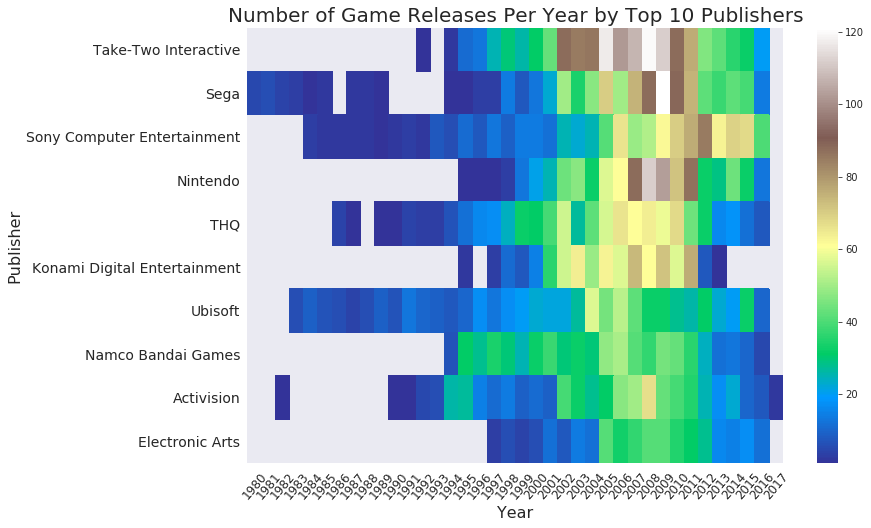

In [19]:
top10 = ['Electronic Arts', 'Activision', 'Namco Bandai Games', 'Ubisoft', 'Konami Digital Entertainment', 'THQ', 'Nintendo', 'Sony Computer Entertainment', 'Sega', 'Take-Two Interactive']
table = df.pivot_table('Global_Sales', columns='Publisher', index='Year', aggfunc='count')
data = [table[i] for i in top10]
data = np.array(data)
data = pd.DataFrame(np.reshape(data, (10, 38)))
years = table.index.astype(int)

plt.figure(figsize=(12,8))
ax = sns.heatmap(data, cmap='terrain')
ax.set_xticklabels(labels = years, fontsize=12, rotation=50)
ax.set_yticklabels(labels = top10[::-1], fontsize=14, rotation=0)
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_ylabel(ylabel='Publisher', fontsize=16)
ax.set_title(label='Number of Game Releases Per Year by Top 10 Publishers', fontsize=20)
plt.show();

Below we create a heatmap of the total revenue generated per year by genre. This dataframe's creation and plotting works similarly to the plots above, except we use "Genre" for both our pivot table columns as well as our list comprehension.

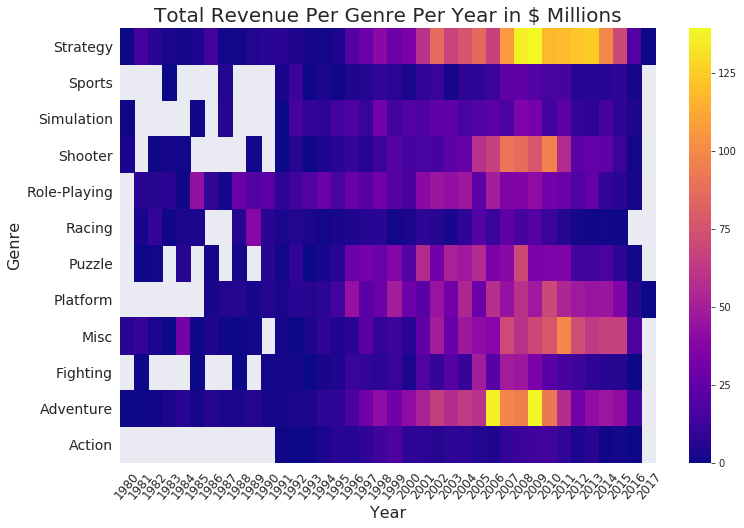

In [20]:
genres = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']
table = df.pivot_table('Global_Sales', columns='Genre', index='Year', aggfunc='sum')
data = [table[i] for i in genres]
data = np.array(data)
data = pd.DataFrame(np.reshape(data, (12, 38)))
years = table.index.astype(int)

plt.figure(figsize=(12,8))
ax = sns.heatmap(data, cmap='plasma')
ax.set_xticklabels(labels = years, fontsize=12, rotation=50)
ax.set_yticklabels(labels = genres[::-1], fontsize=14, rotation=0)
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_ylabel(ylabel='Genre', fontsize=16)
ax.set_title(label='Total Revenue Per Genre Per Year in $ Millions', fontsize=20)
plt.show();

Below we create three plots for genres: total number of games released, total revenue generated and revenue per game released. We compute revenue per game by concetenating our total revenue generated and games released dataframes and then dividing the former column by the latter to get Revenue/Release. For our genres, "rel" is the count of number of games released and "rev" is the total revenue generated.

We groupby, apply sum() or count() and choose the first column using .iloc() when we just want to count entries and ['Global_Sales'] when we want to sum sales. Finally we sort our values and then plot our data, testing a couple of different colour palettes.

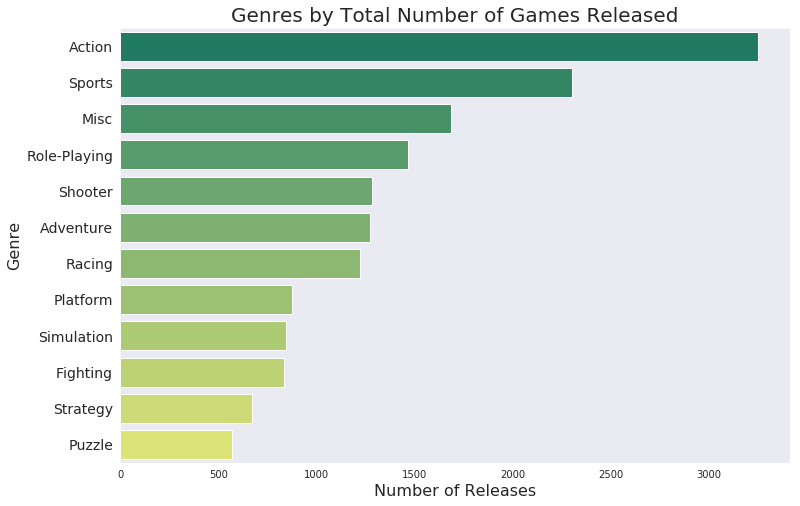

In [21]:
rel = df.groupby(['Genre']).count().iloc[:,0]
rel = pd.DataFrame(rel.sort_values(ascending=False))
genres = rel.index
rel.columns = ['Releases']

colors = sns.color_palette("summer", len(rel))
plt.figure(figsize=(12,8))
ax = sns.barplot(y = genres , x = 'Releases', data=rel, orient='h', palette=colors)
ax.set_xlabel(xlabel='Number of Releases', fontsize=16)
ax.set_ylabel(ylabel='Genre', fontsize=16)
ax.set_title(label='Genres by Total Number of Games Released', fontsize=20)
ax.set_yticklabels(labels = genres, fontsize=14)
plt.show();

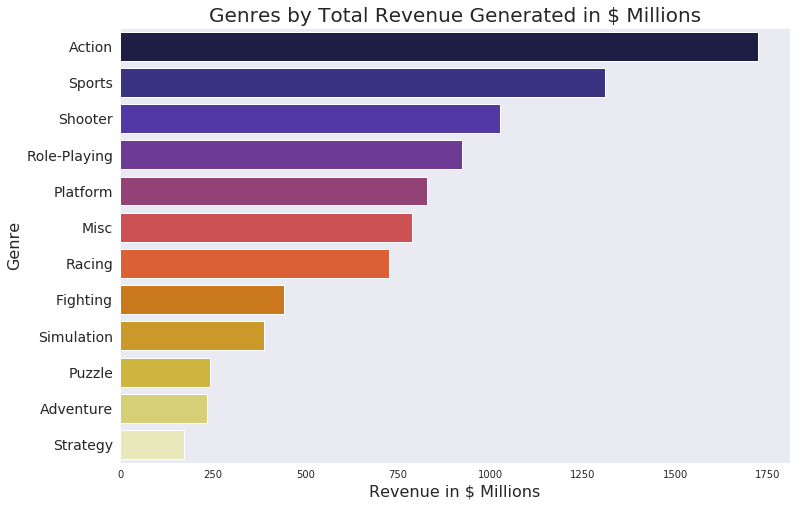

In [22]:
rev = df.groupby(['Genre']).sum()['Global_Sales']
rev = pd.DataFrame(rev.sort_values(ascending=False))
genres = rev.index
rev.columns = ['Revenue']

colors = sns.color_palette('CMRmap', len(rev))
plt.figure(figsize=(12,8))
ax = sns.barplot(y = genres , x = 'Revenue', data=rev, orient='h', palette=colors)
ax.set_xlabel(xlabel='Revenue in $ Millions', fontsize=16)
ax.set_ylabel(ylabel='Genre', fontsize=16)
ax.set_title(label='Genres by Total Revenue Generated in $ Millions', fontsize=20)
ax.set_yticklabels(labels = genres, fontsize=14)
plt.show();

Below we plot the top 10 games by the sales that they have generated since inception. We create a pivot table with the entries that we need and then change it into a dataframe. We also sort the values in descending order and select the first ten values.

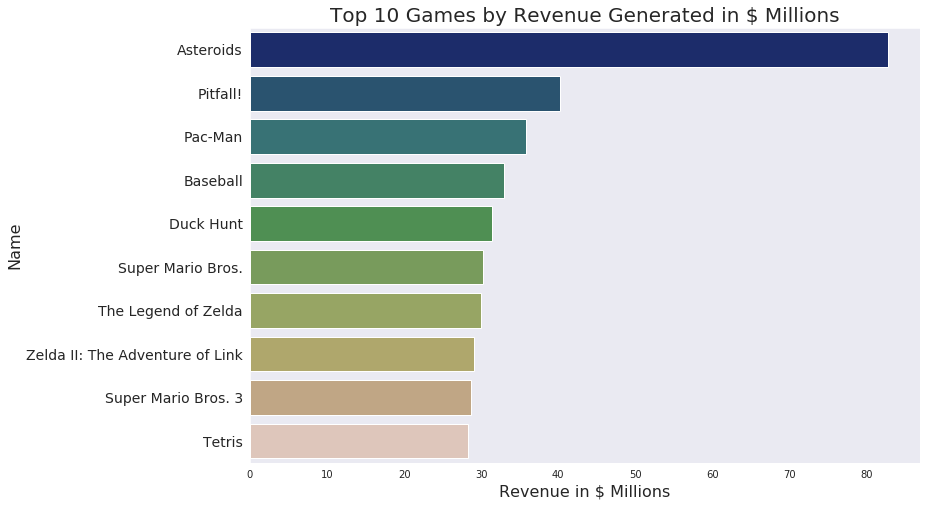

In [23]:
data = pd.concat([df['Name'][0:10], df['Global_Sales'][0:10]], axis=1)

plt.figure(figsize=(12,8))
colors = sns.color_palette("gist_earth", len(data))
ax = sns.barplot(y = 'Name' , x = 'Global_Sales', data=data, orient='h', palette=colors)
ax.set_xlabel(xlabel='Revenue in $ Millions', fontsize=16)
ax.set_ylabel(ylabel='Name', fontsize=16)
ax.set_title(label='Top 10 Games by Revenue Generated in $ Millions', fontsize=20)
ax.set_yticklabels(labels = games, fontsize=14)
plt.show();

Below we plot the total revenue generated by the four regions that the "Global_Sales" column is made up of: namely, the European Union, Japan, North America and other.

First we sum all the columns in our original dataframe. Then we create a dataframe which has regions by selecting columns from our summed data variable. We also create our own regions index because we want the full names for the regions in our plots, not "EU_Sales" etc.

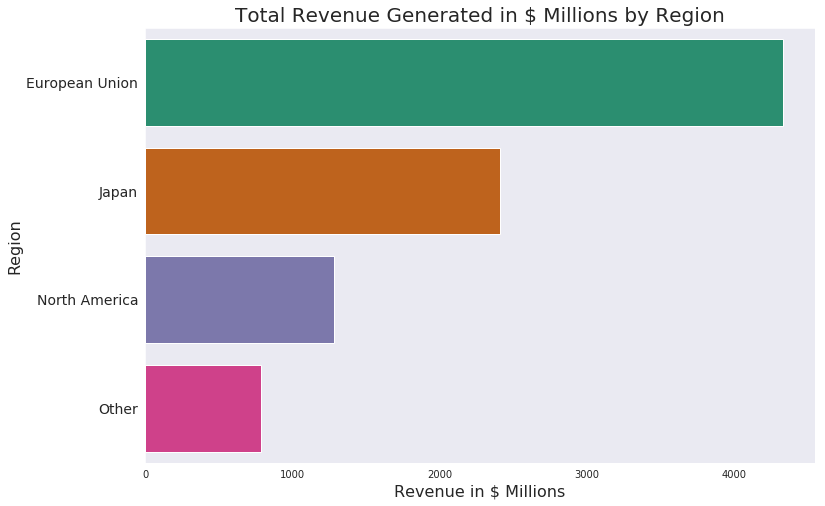

In [24]:
data = df.sum()
data = pd.DataFrame([data['EU_Sales'], data['JP_Sales'], data['NA_Sales'], data['Other_Sales']])
regions = ['European Union', 'Japan', 'North America', 'Other']
data.index = regions
data.columns = ['Revenue']
data = data.sort_values(by='Revenue', ascending=False)

plt.figure(figsize=(12,8))
colors = sns.color_palette("Dark2", len(data))
ax = sns.barplot(y = regions , x = 'Revenue', data=data, orient='h', palette=colors)
ax.set_xlabel(xlabel='Revenue in $ Millions', fontsize=16)
ax.set_ylabel(ylabel='Region', fontsize=16)
ax.set_title(label='Total Revenue Generated in $ Millions by Region', fontsize=20)
ax.set_yticklabels(labels = regions, fontsize=14)
plt.show();

Below we plot the distribution of game sales by region. To do this we need create a data variable which has, as columns, region and has entries for each game (all 16598) in the same was as above, just without using .sum() and by adding .T ("transpose" which swaps rows for columns).

We also create the variable "q" so that we can select only the data that falls within the 90th percentile, which excludes outliers, making it easier for us to observe the distribution of the majority of our data.

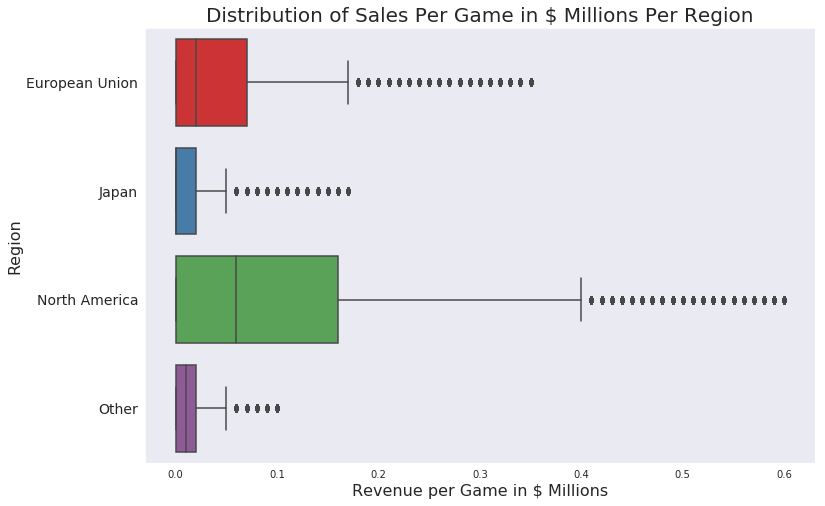

In [25]:
data = df
data = pd.DataFrame([data['EU_Sales'], data['JP_Sales'], data['NA_Sales'], data['Other_Sales']]).T
regions = ['European Union', 'Japan', 'North America', 'Other']
q = data.quantile(0.90)
data = data[data < q]
plt.figure(figsize=(12,8))

colors = sns.color_palette("Set1", len(data))
ax = sns.boxplot(data=data, orient='h', palette=colors)
ax.set_xlabel(xlabel='Revenue per Game in $ Millions', fontsize=16)
ax.set_ylabel(ylabel='Region', fontsize=16)
ax.set_title(label='Distribution of Sales Per Game in $ Millions Per Region', fontsize=20)
ax.set_yticklabels(labels=regions, fontsize=14)
plt.show()

Below we plot the distribution of game sales for every year from 1980-2017 similarly to the way we plotted distribution of sales by region above.

We create a pivot table with 'Global_Sales' seperated by year, for every entry in our dataset. We once again set our percentile so that it is easier to visualize the distribution of the majority of data without outliers. 

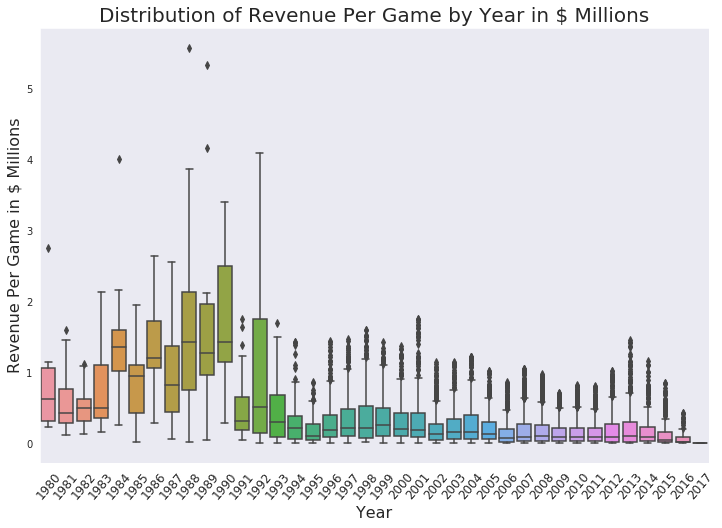

In [26]:
table = df.pivot_table('Global_Sales', columns='Year', index='Name')
q = table.quantile(0.90)
data = table[table < q]
years = table.columns.astype(int)

plt.figure(figsize=(12,8))
ax = sns.boxplot(data=data)
ax.set_xticklabels(labels=years, fontsize=12, rotation=50)
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_ylabel(ylabel='Revenue Per Game in $ Millions', fontsize=16)
ax.set_title(label='Distribution of Revenue Per Game by Year in $ Millions', fontsize=20)
plt.show()
plt.show()

Below we create a pointplot of total sales by region per year. To do this we create four pivot tables that have sales with years as index and game names as columns. We then do another row-wise sum on these pivot tables to get the sum of games sales for that particular year for that particular region.

We then call Seaborn's pointplot four times, passing the dataframe for each region and also setting "scale=..." which adjusts the size of the points in our plot. Note the handling of the legend which, although not very intuitive, can be used with other data by replacing "years" in ax.legend(...) with your index and "regions" with the labels of your plots. Sometimes this cell needs to be run twice before it displays the legend correctly.

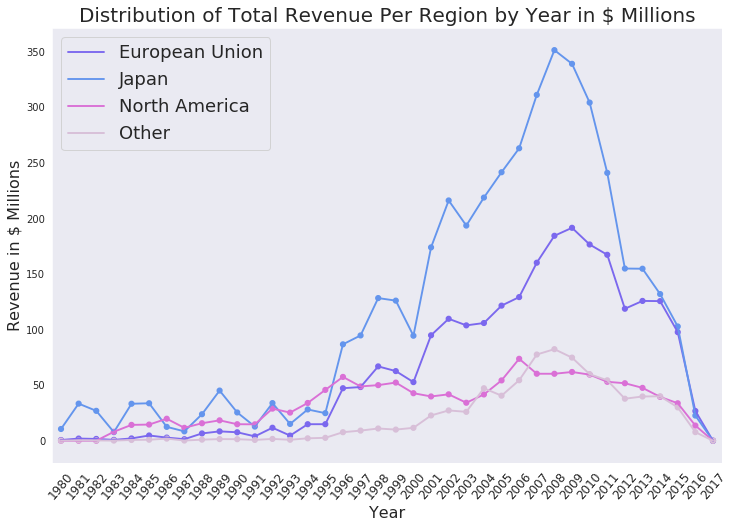

In [27]:
EU = df.pivot_table('EU_Sales', columns='Name', index='Year', aggfunc='sum').sum(axis=1)
NA = df.pivot_table('NA_Sales', columns='Name', index='Year', aggfunc='sum').sum(axis=1)
JP = df.pivot_table('JP_Sales', columns='Name', index='Year', aggfunc='sum').sum(axis=1)
Other = df.pivot_table('Other_Sales', columns='Name', index='Year', aggfunc='sum').sum(axis=1)
years = Other.index.astype(int)
regions = ['European Union','Japan','North America','Other']

plt.figure(figsize=(12,8))
ax = sns.pointplot(x=years, y=EU, color='mediumslateblue', scale=0.7)
ax = sns.pointplot(x=years, y=NA, color='cornflowerblue', scale=0.7)
ax = sns.pointplot(x=years, y=JP, color='orchid', scale=0.7)
ax = sns.pointplot(x=years, y=Other, color='thistle', scale=0.7)
ax.set_xticklabels(labels=years, fontsize=12, rotation=50)
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_ylabel(ylabel='Revenue in $ Millions', fontsize=16)
ax.set_title(label='Distribution of Total Revenue Per Region by Year in $ Millions', fontsize=20)
ax.legend(handles=ax.lines[::len(years)+1], labels=regions, fontsize=18)
plt.show();

BELOW CODE CLEANED UP AND SIMPLIFIED SOON

Market share of top 5 publishers per year, we can see clearly Nintendo's dominance in the 1980s.

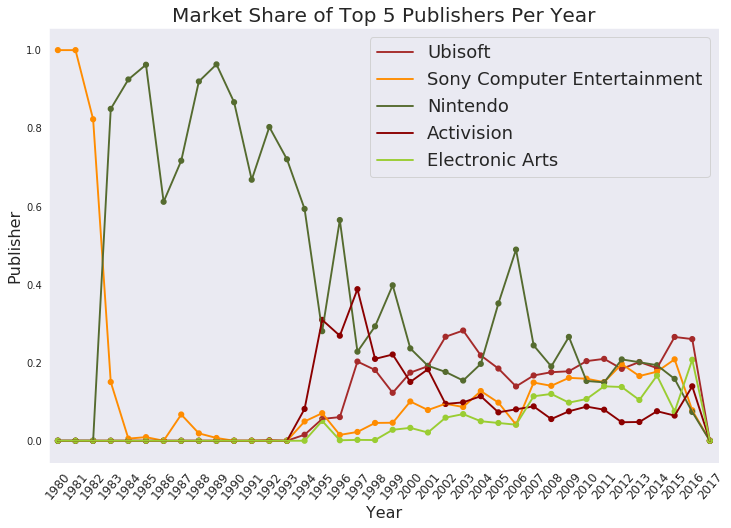

In [28]:
lizt = ['Electronic Arts', 'Activision', 'Namco Bandai Games', 'Ubisoft', 'Konami Digital Entertainment', 'THQ', 'Nintendo', 'Sony Computer Entertainment', 'Sega', 'Take-Two Interactive']
data = df.pivot_table('Global_Sales', columns='Publisher', index='Year', aggfunc='sum')
data = [[data[i] for i in lizt]]
data = np.array(data)
data = np.reshape(data, (10, 38))
data = pd.DataFrame(data)
data.index = lizt
ind = ['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
                '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
                '1996', '1997', '1998', '1999', '2000', '2001', '2002',
                '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
                '2011', '2012', '2013', '2014', '2015', '2016', '2017']
data.columns = ind
data = data.fillna(0)
totals = pd.DataFrame(data.sum()).T
totals = pd.DataFrame(totals)
x1980 = data.iloc[:,0]/totals['1980'].values
x1981 = data.iloc[:,1]/totals['1981'].values
x1982 = data.iloc[:,2]/totals['1982'].values
x1983 = data.iloc[:,3]/totals['1983'].values
x1984 = data.iloc[:,4]/totals['1984'].values
x1985 = data.iloc[:,5]/totals['1985'].values
x1986 = data.iloc[:,6]/totals['1986'].values
x1987 = data.iloc[:,7]/totals['1987'].values
x1988 = data.iloc[:,8]/totals['1988'].values
x1989 = data.iloc[:,9]/totals['1989'].values
x1990 = data.iloc[:,10]/totals['1990'].values
x1991 = data.iloc[:,11]/totals['1991'].values
x1992 = data.iloc[:,12]/totals['1992'].values
x1993 = data.iloc[:,13]/totals['1993'].values
x1994 = data.iloc[:,14]/totals['1994'].values
x1995 = data.iloc[:,15]/totals['1995'].values
x1996 = data.iloc[:,16]/totals['1996'].values
x1997 = data.iloc[:,17]/totals['1997'].values
x1998 = data.iloc[:,18]/totals['1998'].values
x1999 = data.iloc[:,19]/totals['1999'].values
x2000 = data.iloc[:,20]/totals['2000'].values
x2001 = data.iloc[:,21]/totals['2001'].values
x2002 = data.iloc[:,22]/totals['2002'].values
x2003 = data.iloc[:,23]/totals['2003'].values
x2004 = data.iloc[:,24]/totals['2004'].values
x2005 = data.iloc[:,25]/totals['2005'].values
x2006 = data.iloc[:,26]/totals['2006'].values
x2007 = data.iloc[:,27]/totals['2007'].values
x2008 = data.iloc[:,28]/totals['2008'].values
x2009 = data.iloc[:,29]/totals['2009'].values
x2010 = data.iloc[:,30]/totals['2010'].values
x2011 = data.iloc[:,31]/totals['2011'].values
x2012 = data.iloc[:,32]/totals['2012'].values
x2013 = data.iloc[:,33]/totals['2013'].values
x2014 = data.iloc[:,34]/totals['2014'].values
x2015 = data.iloc[:,35]/totals['2015'].values
x2016 = data.iloc[:,36]/totals['2016'].values
x2017 = data.iloc[:,37]/totals['2017'].values

years = [x1980,x1981,x1982,x1983,x1984,x1985,x1986,x1987,x1988,x1989,x1990,x1991,x1992,x1993,x1994,x1995,x1996,x1997,x1998,x1999,x2000,x2001,x2002,x2003,x2004,x2005,x2006,x2007,x2008,x2009,x2010,x2011,x2012,x2013,x2014,x2015,x2016,x2017]
years = pd.concat(years, axis=1)
years.columns = ind
lizt = ['Electronic Arts', 'Activision', 'Nintendo', 'Sony Computer Entertainment', 'Ubisoft']
liztr = lizt[::-1]
plt.figure(figsize=(12,8))
ax = sns.pointplot(x=ind, y=years.loc['Electronic Arts'], color='brown', scale=0.7)
ax = sns.pointplot(x=ind, y=years.loc['Activision'], color='darkorange', scale=0.7)
ax = sns.pointplot(x=ind, y=years.loc['Nintendo'], color='darkolivegreen', scale=0.7)
ax = sns.pointplot(x=ind, y=years.loc['Sony Computer Entertainment'], color='darkred', scale=0.7)
ax = sns.pointplot(x=ind, y=years.loc['Ubisoft'], color='yellowgreen', scale=0.7)
ax.set_xticklabels(labels = ind, fontsize=12, rotation=50)
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_ylabel(ylabel='Publisher', fontsize=16)
ax.set_title(label='Market Share of Top 5 Publishers Per Year', fontsize=20)
ax.legend(handles=ax.lines[::len(ind)+1], labels=liztr, fontsize=18)
plt.show();

BELOW CODE CLEANED UP AND SIMPLIFIED SOON

Top 5 genres per year.

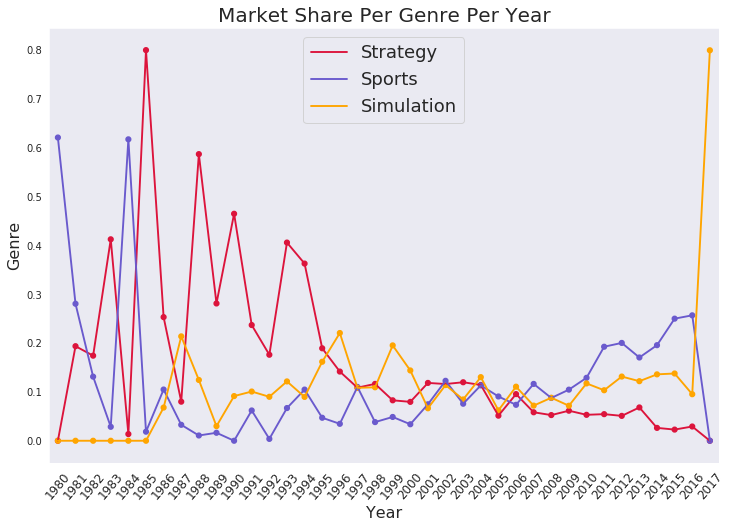

In [29]:
lizt = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']
data = df.pivot_table('Global_Sales', columns='Genre', index='Year', aggfunc='sum')
data = [[data[i] for i in lizt]]
data = np.array(data)
data = np.reshape(data, (12, 38))
data = pd.DataFrame(data)
data.index = lizt
ind = ['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
                '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
                '1996', '1997', '1998', '1999', '2000', '2001', '2002',
                '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
                '2011', '2012', '2013', '2014', '2015', '2016', '2017']
data.columns = ind
data = data.fillna(0)
totals = pd.DataFrame(data.sum()).T
totals = pd.DataFrame(totals)
x1980 = data.iloc[:,0]/totals['1980'].values
x1981 = data.iloc[:,1]/totals['1981'].values
x1982 = data.iloc[:,2]/totals['1982'].values
x1983 = data.iloc[:,3]/totals['1983'].values
x1984 = data.iloc[:,4]/totals['1984'].values
x1985 = data.iloc[:,5]/totals['1985'].values
x1986 = data.iloc[:,6]/totals['1986'].values
x1987 = data.iloc[:,7]/totals['1987'].values
x1988 = data.iloc[:,8]/totals['1988'].values
x1989 = data.iloc[:,9]/totals['1989'].values
x1990 = data.iloc[:,10]/totals['1990'].values
x1991 = data.iloc[:,11]/totals['1991'].values
x1992 = data.iloc[:,12]/totals['1992'].values
x1993 = data.iloc[:,13]/totals['1993'].values
x1994 = data.iloc[:,14]/totals['1994'].values
x1995 = data.iloc[:,15]/totals['1995'].values
x1996 = data.iloc[:,16]/totals['1996'].values
x1997 = data.iloc[:,17]/totals['1997'].values
x1998 = data.iloc[:,18]/totals['1998'].values
x1999 = data.iloc[:,19]/totals['1999'].values
x2000 = data.iloc[:,20]/totals['2000'].values
x2001 = data.iloc[:,21]/totals['2001'].values
x2002 = data.iloc[:,22]/totals['2002'].values
x2003 = data.iloc[:,23]/totals['2003'].values
x2004 = data.iloc[:,24]/totals['2004'].values
x2005 = data.iloc[:,25]/totals['2005'].values
x2006 = data.iloc[:,26]/totals['2006'].values
x2007 = data.iloc[:,27]/totals['2007'].values
x2008 = data.iloc[:,28]/totals['2008'].values
x2009 = data.iloc[:,29]/totals['2009'].values
x2010 = data.iloc[:,30]/totals['2010'].values
x2011 = data.iloc[:,31]/totals['2011'].values
x2012 = data.iloc[:,32]/totals['2012'].values
x2013 = data.iloc[:,33]/totals['2013'].values
x2014 = data.iloc[:,34]/totals['2014'].values
x2015 = data.iloc[:,35]/totals['2015'].values
x2016 = data.iloc[:,36]/totals['2016'].values
x2017 = data.iloc[:,37]/totals['2017'].values

years = [x1980,x1981,x1982,x1983,x1984,x1985,x1986,x1987,x1988,x1989,x1990,x1991,x1992,x1993,x1994,x1995,x1996,x1997,x1998,x1999,x2000,x2001,x2002,x2003,x2004,x2005,x2006,x2007,x2008,x2009,x2010,x2011,x2012,x2013,x2014,x2015,x2016,x2017]
years = pd.concat(years, axis=1)
years.columns = ind
data.columns = ind
liztr = lizt[::-1]
lizt = ['Electronic Arts', 'Activision', 'Nintendo', 'Sony Computer Entertainment', 'Ubisoft']
plt.figure(figsize=(12,8))
ax = sns.pointplot(x=ind, y=years.loc['Platform'], color='crimson', scale=0.7)
ax = sns.pointplot(x=ind, y=years.loc['Shooter'], color='slateblue', scale=0.7)
ax = sns.pointplot(x=ind, y=years.loc['Role-Playing'], color='orange', scale=0.7)
ax.set_xticklabels(labels = ind, fontsize=12, rotation=50)
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_ylabel(ylabel='Genre', fontsize=16)
ax.set_title(label='Market Share Per Genre Per Year', fontsize=20)
ax.legend(handles=ax.lines[::len(ind)+1], labels=liztr, fontsize=18)
plt.show();

Below, we first define a function that will make it easier to use Seaborn's barplot as subplots. For a single row of barplot subplots, the function takes an axes object and turns off the xlabels and ylabels to make our final plot cleaner.

We then create pivot tables for the sum of sales by publisher per region, sort in descending order and then select the top 3. We create our own colour palette(dictionary) which matches all the top three entries for our regional dataframes using the named colours from https://xkcd.com/color/rgb/.

We create our subplots add subplots in the format: fig.add_subplot('rows', 'columns', 'plot number')
Therefore "fig.add_subplot(1,4,1)" means one row of four subplots, this plot being the first. We create our four subplots seperately. The first subplot differs from the following three in that our turn_off_labels() function is called without the additional "first=False" parameter.

In [30]:
def turn_off_labels(ax, first=True):
    if first == False:
        x_axis = ax.axes.get_xaxis()
        x_label = x_axis.get_label()
        x_label.set_visible(False)
        y_axis = ax.axes.get_yaxis()
        y_axis.set_visible(False)
    else:
        x_axis = ax.axes.get_xaxis()
        x_label = x_axis.get_label()
        x_label.set_visible(False)

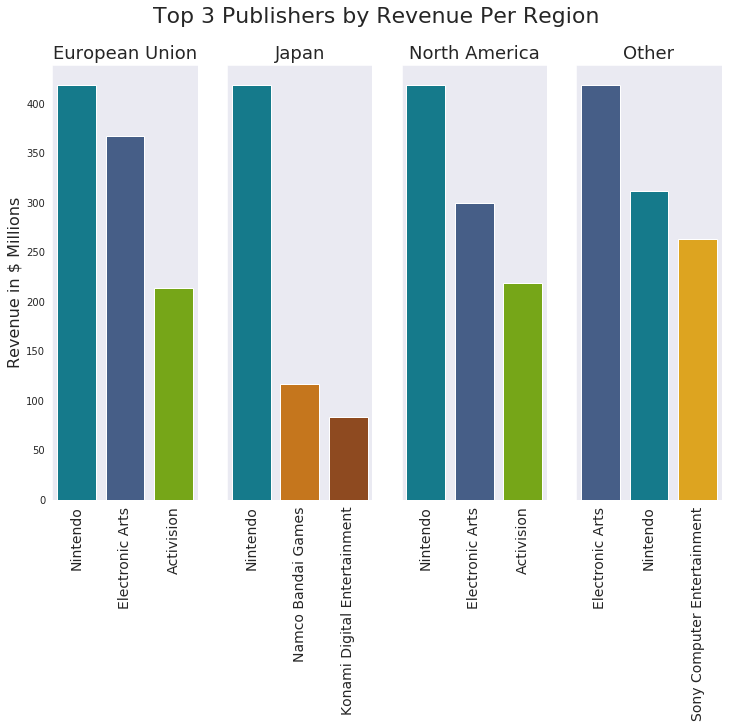

In [31]:
EU = df.pivot_table('EU_Sales', columns='Publisher', aggfunc='sum').T
EU = EU.sort_values(by='EU_Sales', ascending=False).iloc[0:3]
EU_publishers = EU.index

JP = df.pivot_table('JP_Sales', columns='Publisher', aggfunc='sum').T
JP = JP.sort_values(by='JP_Sales', ascending=False).iloc[0:3]
JP_publishers = JP.index

NA = df.pivot_table('NA_Sales', columns='Publisher', aggfunc='sum').T
NA = NA.sort_values(by='NA_Sales', ascending=False).iloc[0:3]
NA_publishers = NA.index

Other = df.pivot_table('Other_Sales', columns='Publisher', aggfunc='sum').T
Other = Other.sort_values(by='Other_Sales', ascending=False).iloc[0:3]
Other_publishers = Other.index

colors =  {'Nintendo':sns.xkcd_rgb["teal blue"], 'Electronic Arts':sns.xkcd_rgb["denim blue"], 'Activision':sns.xkcd_rgb["dark lime green"], 'Namco Bandai Games':sns.xkcd_rgb["pumpkin"], 'Konami Digital Entertainment':sns.xkcd_rgb["burnt umber"], 'Sony Computer Entertainment':sns.xkcd_rgb["yellow orange"]}
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,4,1)
ax1.set_xticklabels(labels = EU_publishers, rotation=90, size=14)
turn_off_labels(ax1)
sns.barplot(x=EU_publishers, y=EU['EU_Sales'], palette=colors)
plt.title('European Union', size=18)
plt.ylabel('Revenue in $ Millions', size=16)

ax2 = fig.add_subplot(1,4,2)
ax2.set_xticklabels(labels = JP_publishers, rotation=90, size=14)
turn_off_labels(ax2, first=False)
sns.barplot(x=JP_publishers, y=JP['JP_Sales'], palette=colors)
plt.title('Japan', size=18)

ax3 = fig.add_subplot(1,4,3)
ax3.set_xticklabels(labels = NA_publishers, rotation=90, size=14)
turn_off_labels(ax3, first=False)
sns.barplot(x=NA_publishers, y=NA['NA_Sales'], palette=colors)
plt.title('North America', size=18)

ax4 = fig.add_subplot(1,4,4)
ax4.set_xticklabels(labels = Other_publishers, rotation=90, size=14)
turn_off_labels(ax4, first=False)
sns.barplot(x=Other_publishers, y=Other['Other_Sales'], palette=colors)
plt.title('Other', size=18)
plt.suptitle('Top 3 Publishers by Revenue Per Region', size=22)
plt.show();

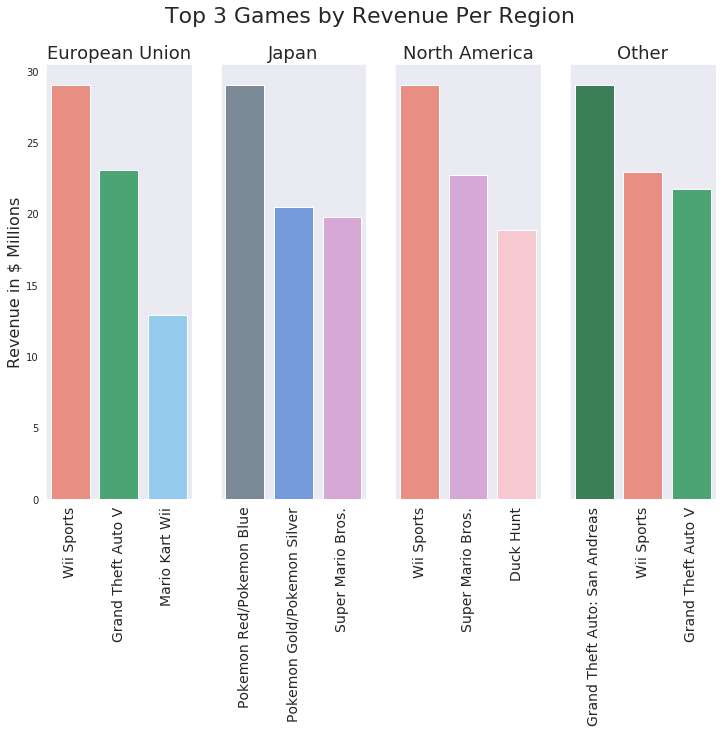

In [32]:
EU = df.pivot_table('EU_Sales', columns='Name', aggfunc='sum').T
EU = EU.sort_values(by='EU_Sales', ascending=False).iloc[0:3]
EU_games = EU.index

JP = df.pivot_table('JP_Sales', columns='Name', aggfunc='sum').T
JP = JP.sort_values(by='JP_Sales', ascending=False).iloc[0:3]
JP_games = JP.index

NA = df.pivot_table('NA_Sales', columns='Name', aggfunc='sum').T
NA = NA.sort_values(by='NA_Sales', ascending=False).iloc[0:3]
NA_games = NA.index

Other = df.pivot_table('Other_Sales', columns='Name', aggfunc='sum').T
Other = Other.sort_values(by='Other_Sales', ascending=False).iloc[0:3]
Other_games = Other.index

colors =  {'Wii Sports':"salmon", 'Grand Theft Auto V':"mediumseagreen", 'Mario Kart Wii':"lightskyblue", 'Pokemon Red/Pokemon Blue':"lightslategray", 'Pokemon Gold/Pokemon Silver':"cornflowerblue", 'Super Mario Bros.':"plum", 'Duck Hunt':"pink", 'Grand Theft Auto: San Andreas':"seagreen"}
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,4,1)
ax1.set_xticklabels(labels = EU_games, rotation=90, size=14)
turn_off_labels(ax1)
sns.barplot(x=EU_games, y=EU['EU_Sales'], palette=colors)
plt.title('European Union', size=18)
plt.ylabel('Revenue in $ Millions', size=16)

ax2 = fig.add_subplot(1,4,2)
ax2.set_xticklabels(labels = JP_games, rotation=90, size=14)
turn_off_labels(ax2, first=False)
sns.barplot(x=JP_games, y=JP['JP_Sales'], palette=colors)
plt.title('Japan', size=18)

ax3 = fig.add_subplot(1,4,3)
ax3.set_xticklabels(labels = NA_games, rotation=90, size=14)
turn_off_labels(ax3, first=False)
sns.barplot(x=NA_games, y=NA['NA_Sales'], palette=colors)
plt.title('North America', size=18)

ax4 = fig.add_subplot(1,4,4)
ax4.set_xticklabels(labels = Other_games, rotation=90, size=14)
turn_off_labels(ax4, first=False)
sns.barplot(x=Other_games, y=Other['Other_Sales'], palette=colors)
plt.title('Other', size=18)
plt.suptitle('Top 3 Games by Revenue Per Region', size=22)
plt.show();

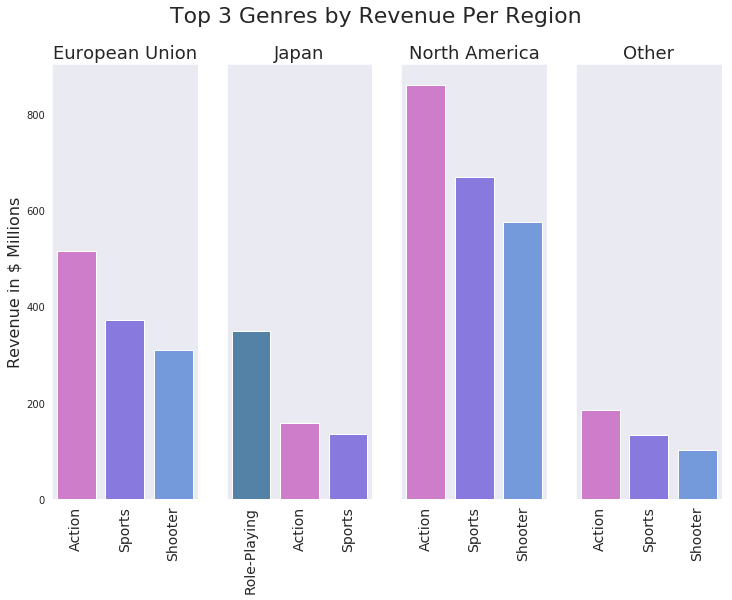

In [33]:
EU = df.pivot_table('EU_Sales', columns='Genre', aggfunc='sum').T
EU = EU.sort_values(by='EU_Sales', ascending=False).iloc[0:3]
EU_genres = EU.index

JP = df.pivot_table('JP_Sales', columns='Genre', aggfunc='sum').T
JP = JP.sort_values(by='JP_Sales', ascending=False).iloc[0:3]
JP_genres = JP.index

NA = df.pivot_table('NA_Sales', columns='Genre', aggfunc='sum').T
NA = NA.sort_values(by='NA_Sales', ascending=False).iloc[0:3]
NA_genres = NA.index

Other = df.pivot_table('Other_Sales', columns='Genre', aggfunc='sum').T
Other = Other.sort_values(by='Other_Sales', ascending=False).iloc[0:3]
Other_genres = Other.index

colors =  {'Action':"orchid", 'Sports':"mediumslateblue", 'Shooter':"cornflowerblue", 'Role-Playing':"steelblue"}
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,4,1)
ax1.set_xticklabels(labels = EU_genres, rotation=90, size=14)
turn_off_labels(ax1)
sns.barplot(x=EU_genres, y=EU['EU_Sales'], palette=colors)
plt.title('European Union', size=18)
plt.ylabel('Revenue in $ Millions', size=16)

ax2 = fig.add_subplot(1,4,2, sharey=ax1)
ax2.set_xticklabels(labels = JP_genres, rotation=90, size=14)
turn_off_labels(ax2, first=False)
sns.barplot(x=JP_genres, y=JP['JP_Sales'], palette=colors)
plt.title('Japan', size=18)

ax3 = fig.add_subplot(1,4,3, sharey=ax1)
ax3.set_xticklabels(labels = NA_genres, rotation=90, size=14)
turn_off_labels(ax3, first=False)
sns.barplot(x=NA_genres, y=NA['NA_Sales'], palette=colors)
plt.title('North America', size=18)

ax4 = fig.add_subplot(1,4,4, sharey=ax1)
ax4.set_xticklabels(labels = Other_genres, rotation=90, size=14)
turn_off_labels(ax4, first=False)
sns.barplot(x=Other_genres, y=Other['Other_Sales'], palette=colors)
plt.title('Other', size=18)
plt.suptitle('Top 3 Genres by Revenue Per Region', size=22)
plt.show();

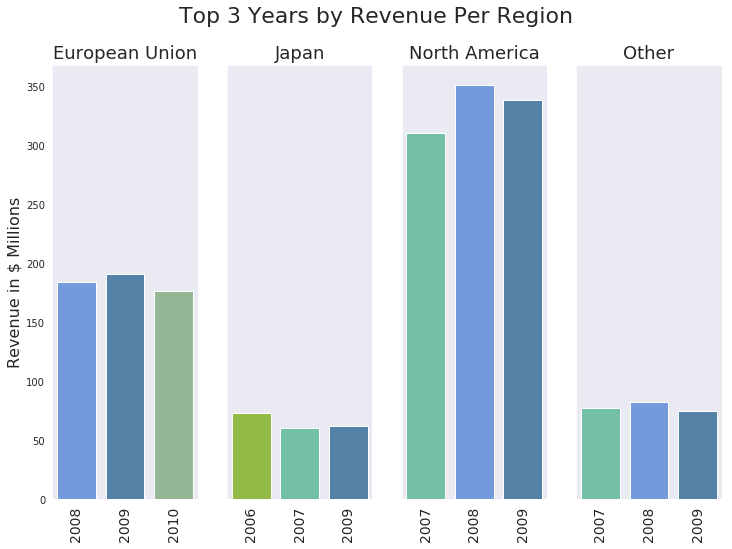

In [34]:
EU = df.pivot_table('EU_Sales', columns='Year', aggfunc='sum').T
EU = EU.sort_values(by='EU_Sales', ascending=False).iloc[0:3]
EU_years = EU.index.astype(int)

JP = df.pivot_table('JP_Sales', columns='Year', aggfunc='sum').T
JP = JP.sort_values(by='JP_Sales', ascending=False).iloc[0:3]
JP_years = JP.index.astype(int)

NA = df.pivot_table('NA_Sales', columns='Year', aggfunc='sum').T
NA = NA.sort_values(by='NA_Sales', ascending=False).iloc[0:3]
NA_years = NA.index.astype(int)

Other = df.pivot_table('Other_Sales', columns='Year', aggfunc='sum').T
Other = Other.sort_values(by='Other_Sales', ascending=False).iloc[0:3]
Other_years = Other.index.astype(int)

colors =  {2006.0:"yellowgreen", 2007.0:"mediumaquamarine", 2008.0:"cornflowerblue", 2009.0:"steelblue", 2010.0:"darkseagreen"}
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,4,1)
ax1.set_xticklabels(labels = EU_years, rotation=90, size=14)
turn_off_labels(ax1)
sns.barplot(x=EU_years, y=EU['EU_Sales'], palette=colors)
plt.title('European Union', size=18)
plt.ylabel('Revenue in $ Millions', size=16)

ax2 = fig.add_subplot(1,4,2, sharey=ax1)
ax2.set_xticklabels(labels = JP_years, rotation=90, size=14)
turn_off_labels(ax2, first=False)
sns.barplot(x=JP_years, y=JP['JP_Sales'], palette=colors)
plt.title('Japan', size=18)

ax3 = fig.add_subplot(1,4,3, sharey=ax1)
ax3.set_xticklabels(labels = NA_years, rotation=90, size=14)
turn_off_labels(ax3, first=False)
sns.barplot(x=NA_years, y=NA['NA_Sales'], palette=colors)
plt.title('North America', size=18)

ax4 = fig.add_subplot(1,4,4, sharey=ax1)
ax4.set_xticklabels(labels = Other.index, rotation=90, size=14)
turn_off_labels(ax4, first=False)
sns.barplot(x=Other_years, y=Other['Other_Sales'], palette=colors)
plt.title('Other', size=18)
plt.suptitle('Top 3 Years by Revenue Per Region', size=22)
plt.show();

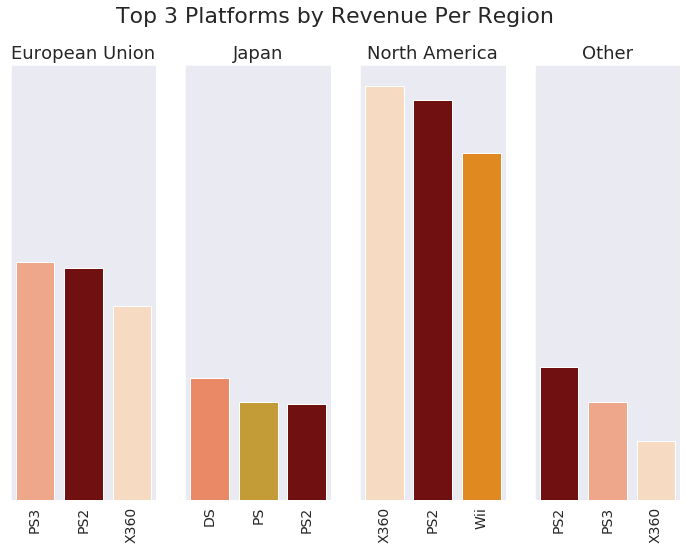

In [35]:
EU = df.pivot_table('EU_Sales', columns='Platform', aggfunc='sum').T
EU = EU.sort_values(by='EU_Sales', ascending=False).iloc[0:3]
EU_plats = EU.index

JP = df.pivot_table('JP_Sales', columns='Platform', aggfunc='sum').T
JP = JP.sort_values(by='JP_Sales', ascending=False).iloc[0:3]
JP_plats = JP.index

NA = df.pivot_table('NA_Sales', columns='Platform', aggfunc='sum').T
NA = NA.sort_values(by='NA_Sales', ascending=False).iloc[0:3]
NA_plats = NA.index

Other = df.pivot_table('Other_Sales', columns='Platform', aggfunc='sum').T
Other = Other.sort_values(by='Other_Sales', ascending=False).iloc[0:3]
Other_plats = Other.index

colors =  {'PS':"goldenrod", 'PS2':"maroon", 'PS3':"lightsalmon", 'DS':"coral", 'X360':"peachpuff", 'Wii':"darkorange"}
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,4,1)
ax1.set_xticklabels(labels = EU_plats, rotation=90, size=14)
turn_off_labels(ax1, first=False)
sns.barplot(x=EU_plats, y=EU['EU_Sales'], palette=colors)
plt.title('European Union', size=18)
plt.ylabel('Revenue in $ Millions', size=16)

ax2 = fig.add_subplot(1,4,2, sharey=ax1)
ax2.set_xticklabels(labels = JP_plats, rotation=90, size=14)
turn_off_labels(ax2, first=False)
sns.barplot(x=JP_plats, y=JP['JP_Sales'], palette=colors)
plt.title('Japan', size=18)

ax3 = fig.add_subplot(1,4,3, sharey=ax1)
ax3.set_xticklabels(labels = NA_plats, rotation=90, size=14)
turn_off_labels(ax3, first=False)
sns.barplot(x=NA_plats, y=NA['NA_Sales'], palette=colors)
plt.title('North America', size=18)

ax4 = fig.add_subplot(1,4,4, sharey=ax1)
ax4.set_xticklabels(labels = Other_plats, rotation=90, size=14)
turn_off_labels(ax4, first=False)
sns.barplot(x=Other_plats, y=Other['Other_Sales'], palette=colors)
plt.title('Other', size=18)
plt.suptitle('Top 3 Platforms by Revenue Per Region', size=22)
plt.show();

/home/bharatmishra/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/bharatmishra/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/bharatmishra/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


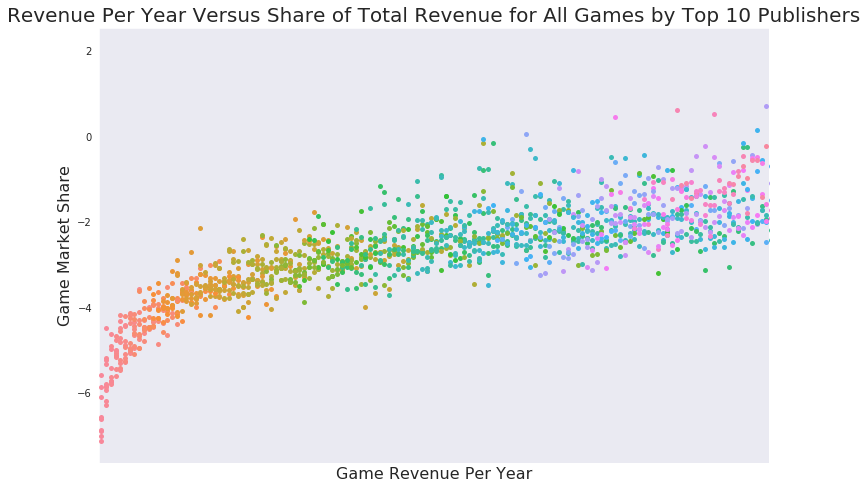

In [36]:
rpy = df['Global_Sales'] / (2017 - df['Year'])
ms = df['Global_Sales'] / df['Global_Sales'].sum()
df['RevPG'] = rpy
df['MktShr'] = ms

data1 = df.pivot_table('MktShr', columns='Publisher', index='Global_Sales')
data2 = df.pivot_table('RevPG', columns='Publisher', index='Global_Sales')

EA1 = data1['Electronic Arts']
Act1 = data1['Activision']
Ubi1 = data1['Ubisoft']
Nint1 = data1['Nintendo']
Sony1 = data1['Sony Computer Entertainment']
Tktwo1 = data1['Take-Two Interactive']
Namc1 = data1['Namco Bandai Games']
Kona1 = data1['Konami Digital Entertainment']
THQ1 = data1['THQ']
Seg1 = data1['Sega']

lizt1 = [EA1, Act1, Ubi1, Nint1, Sony1, Tktwo1, Namc1, Kona1, THQ1, Seg1]
data1 = pd.concat(lizt1, ignore_index=True, axis=1)
data1.columns = ['Electronic Arts', 'Activision', 'Ubisoft', 'Nintendo', 'Sony Computer Entertainment', 'Take-Two Interactive', 'Namco Bandai Games', 'Konami Digital Entertainment', 'THQ', 'Sega']
data1.index = range(0, len((data1)))

EA2 = data2['Electronic Arts']
Act2 = data2['Activision']
Ubi2 = data2['Ubisoft']
Nint2 = data2['Nintendo']
Sony2 = data2['Sony Computer Entertainment']
Tktwo2 = data2['Take-Two Interactive']
Namc2 = data2['Namco Bandai Games']
Kona2 = data2['Konami Digital Entertainment']
THQ2 = data2['THQ']
Seg2 = data2['Sega']

lizt2 = [EA2, Act2, Ubi2, Nint2, Sony2, Tktwo2, Namc2, Kona2, THQ2, Seg2]
data2 = pd.concat(lizt2, ignore_index=True, axis=1)
data2.columns = ['Electronic Arts', 'Activision', 'Ubisoft', 'Nintendo', 'Sony Computer Entertainment', 'Take-Two Interactive', 'Namco Bandai Games', 'Konami Digital Entertainment', 'THQ', 'Sega']
data2.index = range(0, len((data1)))

fig = plt.figure(figsize=(12,8))
ax = sns.swarmplot(x=np.log(data1['Activision']), y=np.log(data2['Activision']), label='Activision')
ax = sns.swarmplot(x=np.log(data1['Ubisoft']), y=np.log(data2['Ubisoft']), label='Ubisoft')
ax = sns.swarmplot(x=np.log(data1['Nintendo']), y=np.log(data2['Nintendo']), label='Nintendo')
ax = sns.swarmplot(x=np.log(data1['Take-Two Interactive']), y=np.log(data2['Take-Two Interactive']), label='Take=Two Interactive')
ax = sns.swarmplot(x=np.log(data1['Sony Computer Entertainment']), y=np.log(data2['Sony Computer Entertainment']), label='Sony Computer Entertainment')
ax = sns.swarmplot(x=np.log(data1['Electronic Arts']), y=np.log(data2['Electronic Arts']), label='Electronic Arts')
ax = sns.swarmplot(x=np.log(data1['Namco Bandai Games']), y=np.log(data2['Namco Bandai Games']), label='Namco Bandai Games')
ax = sns.swarmplot(x=np.log(data1['Konami Digital Entertainment']), y=np.log(data2['Konami Digital Entertainment']), label='Konami Digital Entertainment')
ax = sns.swarmplot(x=np.log(data1['THQ']), y=np.log(data2['THQ']), label='THQ')
ax = sns.swarmplot(x=np.log(data1['Sega']), y=np.log(data2['Sega']), label='Sega')



ax.set_xlabel(xlabel='Game Revenue Per Year', fontsize=16)
ax.set_ylabel(ylabel='Game Market Share', fontsize=16)
ax.set_title(label='Revenue Per Year Versus Share of Total Revenue for All Games by Top 10 Publishers', fontsize=20)

plt.tick_params(axis='x', which='both', bottom='off',
                top='off', labelbottom='off')
plt.show();

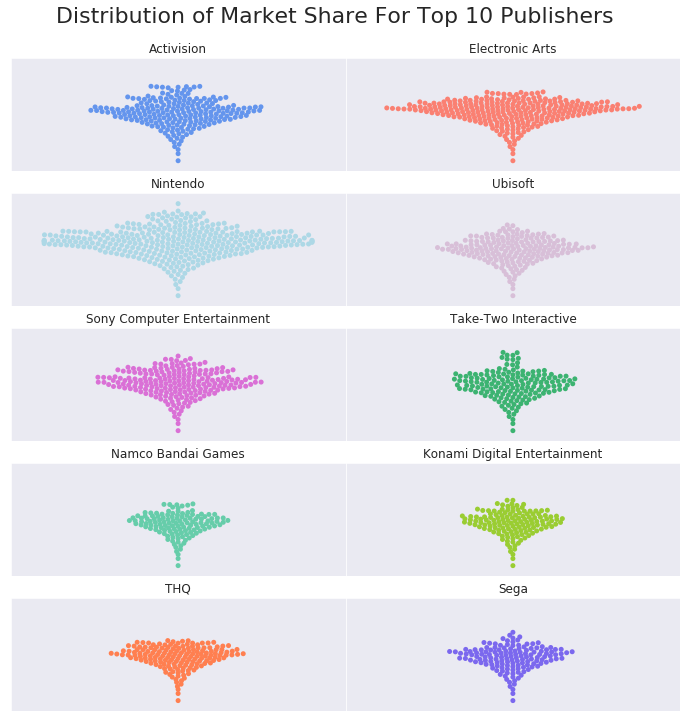

In [37]:
act = data1['Activision']
EA = data1['Electronic Arts']
ubi = data1['Ubisoft']
nint = data1['Nintendo']
sony = data1['Sony Computer Entertainment']
tktwo = data1['Take-Two Interactive']
Namc = data1['Namco Bandai Games']
Kona = data1['Konami Digital Entertainment']
THQ = data1['THQ']
Seg = data1['Sega']

act = np.log(act)
EA = np.log(EA)
ubi = np.log(ubi)
nint = np.log(nint)
sony = np.log(sony)
tktwo = np.log(tktwo)
Namc = np.log(Namc)
Kona = np.log(Kona)
THQ = np.log(THQ)
Seg = np.log(Seg)

min1 = nint.min() - 1
max1 = nint.max() + 1

fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(5,2,1)

sns.swarmplot(y=act, color='cornflowerblue')
plt.title('Activision', size=12)
ax1.set_ylim([min1,max1])
y_axis = ax1.axes.get_yaxis()
y_axis.set_visible(False)

ax2 = fig.add_subplot(5,2,2)
sns.swarmplot(y=EA, color='salmon')
plt.title('Electronic Arts', size=12)
ax2.set_ylim([min1,max1])
y_axis = ax2.axes.get_yaxis()
y_axis.set_visible(False)

ax3 = fig.add_subplot(5,2,3)
sns.swarmplot(y=nint, color='lightblue')
plt.title('Nintendo', size=12)
ax3.set_ylim([min1,max1])
y_axis = ax3.axes.get_yaxis()
y_axis.set_visible(False)

ax4 = fig.add_subplot(5,2,4)
sns.swarmplot(y=ubi, color='thistle')
plt.title('Ubisoft', size=12)
ax4.set_ylim([min1,max1])
y_axis = ax4.axes.get_yaxis()
y_axis.set_visible(False)

ax5 = fig.add_subplot(5,2,5)
sns.swarmplot(y=sony, color='orchid')
plt.title('Sony Computer Entertainment', size=12)
ax5.set_ylim([min1,max1])
y_axis = ax5.axes.get_yaxis()
y_axis.set_visible(False)

ax6 = fig.add_subplot(5,2,6)
sns.swarmplot(y=tktwo, color='mediumseagreen')
ax6.set_ylim([min1,max1])
y_axis = ax6.axes.get_yaxis()
y_axis.set_visible(False)
plt.title('Take-Two Interactive', size=12)

ax7 = fig.add_subplot(5,2,7)
sns.swarmplot(y=Namc, color='mediumaquamarine')
ax7.set_ylim([min1,max1])
y_axis = ax7.axes.get_yaxis()
y_axis.set_visible(False)
plt.title('Namco Bandai Games', size=12)

ax8 = fig.add_subplot(5,2,8)
sns.swarmplot(y=Kona, color='yellowgreen')
ax8.set_ylim([min1,max1])
y_axis = ax8.axes.get_yaxis()
y_axis.set_visible(False)
plt.title('Konami Digital Entertainment', size=12)

ax9 = fig.add_subplot(5,2,9)
sns.swarmplot(y=THQ, color='coral')
ax9.set_ylim([min1,max1])
y_axis = ax9.axes.get_yaxis()
y_axis.set_visible(False)
plt.title('THQ', size=12)

ax10 = fig.add_subplot(5,2,10)
sns.swarmplot(y=Seg, color='mediumslateblue')
ax10.set_ylim([min1,max1])
y_axis = ax10.axes.get_yaxis()
y_axis.set_visible(False)
plt.title('Sega', size=12)
plt.suptitle('Distribution of Market Share For Top 10 Publishers', size=22, x=0.5, y=0.94)
plt.subplots_adjust(wspace=0)
plt.show();


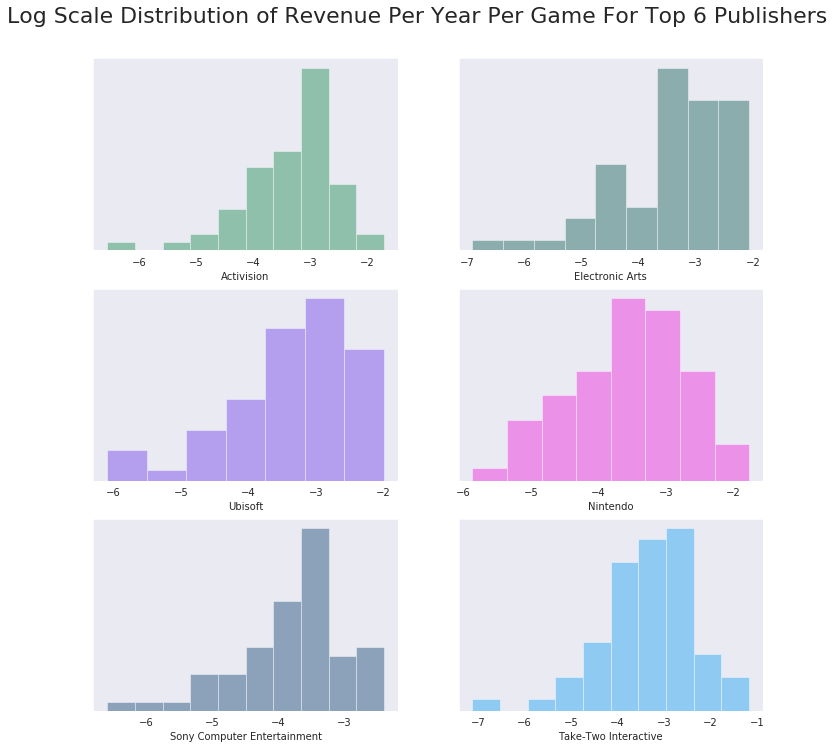

In [38]:
data2 = data2.dropna()
act = data2['Activision']
EA = data2['Electronic Arts']
ubi = data2['Ubisoft']
nint = data2['Nintendo']
sony = data2['Sony Computer Entertainment']
tktwo = data2['Take-Two Interactive']

act = np.log(act)
EA = np.log(EA)
ubi = np.log(ubi)
nint = np.log(nint)
sony = np.log(sony)
tktwo = np.log(tktwo)

fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(3,2,1)
sns.distplot(act, kde=False, color=sns.xkcd_rgb["jungle green"])
y_axis = ax1.axes.get_yaxis()
y_axis.set_visible(False)

ax2 = fig.add_subplot(3,2,2)
sns.distplot(EA, kde=False, color=sns.xkcd_rgb["dark blue green"])
y_axis = ax2.axes.get_yaxis()
y_axis.set_visible(False)

ax3 = fig.add_subplot(3,2,3)
sns.distplot(ubi, kde=False, color=sns.xkcd_rgb["purple blue"])
y_axis = ax3.axes.get_yaxis()
y_axis.set_visible(False)

ax4 = fig.add_subplot(3,2,4)
sns.distplot(nint, kde=False, color=sns.xkcd_rgb["fuchsia"])
y_axis = ax4.axes.get_yaxis()
y_axis.set_visible(False)

ax5 = fig.add_subplot(3,2,5)
sns.distplot(sony, kde=False, color=sns.xkcd_rgb["marine blue"])
y_axis = ax5.axes.get_yaxis()
y_axis.set_visible(False)

ax6 = fig.add_subplot(3,2,6)
sns.distplot(tktwo, kde=False, color=sns.xkcd_rgb["azure"])
y_axis = ax6.axes.get_yaxis()
y_axis.set_visible(False)

plt.suptitle('Log Scale Distribution of Revenue Per Year Per Game For Top 6 Publishers', size=22, x=0.5, y=0.94)
plt.show();